# Most In-Demand Skill for a Data Analyst in Cork(Ireland)

### Let us explore most demanding skill for Data/Business Analyst to have in Cork(Ireland)

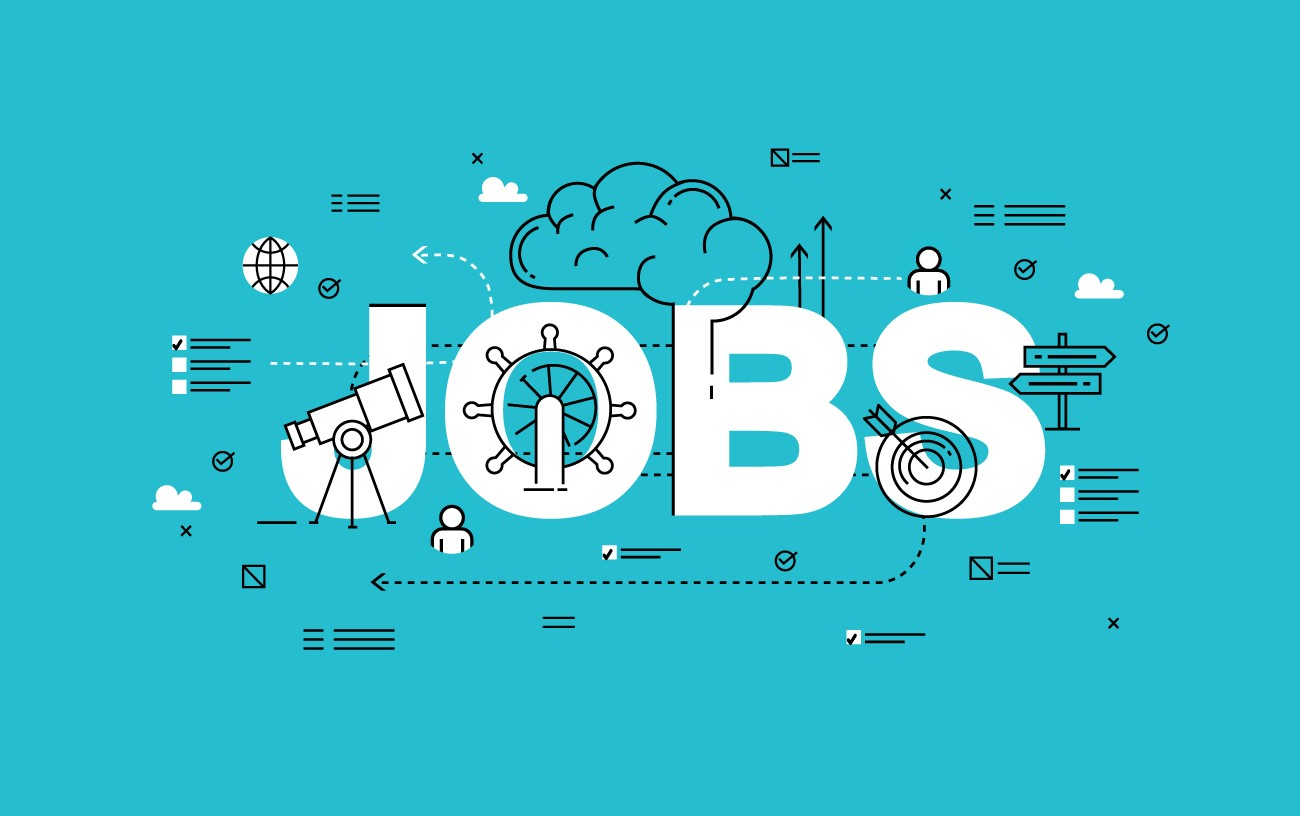

Pic Credit: freepik.com

***

### Introduction

As I prepare to pursue an MS in Business Analytics this upcoming fall, I'm taking a proactive step towards understanding the job market dynamics in Cork. Through this project, my goal is to explore the current job landscape and identify the essential skills sought after for Data and Business Analyst roles. While Python stands as a cornerstone, I'm keen on uncovering additional in-demand proficiencies to ensure a competitive skill set.

### Data Acquisition

To gather relevant insights, I employed Selenium for web scraping on indeed.com. The focus was on extracting job descriptions for Data Analyst positions in Cork. The resultant dataset, comprising 62 entries, includes job titles, company names, titles, and descriptions. Despite its size, this dataset holds the key to deciphering prevailing trends and high-demand skills within the Cork job market.

Moving forward, I'll delve into the data, conduct exploratory analysis, and unveil consistent skill patterns desired by employers. This undertaking not only sheds light on evolving job requirements but also equips me to proactively prepare for the dynamic landscape of Data and Business Analytics roles.

***

### Importing the required libraries
Below are the libraries that are used in this project

In [21]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
import matplotlib.pyplot as plt

***

### Loading the Data

On Kaggle, I first uploaded the data from my system. Once the data was added, I hovered over the data file and copied the file path. This file path can then be utilized to read the data using the read_csv function from the Pandas library.


In [22]:
cork_job = pd.read_csv("/kaggle/input/job-description-cork/Indeed-jobs_with_description.csv")
# To display the top 10 rows 
cork_job.head(10) 

,Job Title,Company,Location,JOb Description
0,Quantitative Risk Analyst,Centrica,"Cork, County Cork",Role Purpose\nBord Gais is a leading verticall...
1,Business Analyst,Johnson & Johnson,"Cork, County Cork",Position: Business Analyst (MD Plan Data Analy...
2,Post Market Data analyst,Stryker,"Cork, County Cork",Why join Stryker?\nWe are proud to be named on...
3,IT Business Analyst,permanent tsb,"Cork, County Cork",Permanent TSB is one of Ireland's leading reta...
4,Analyst/ Sr. Analyst - Data Architect,Lilly,"Cork, County Cork","At Lilly, we unite caring with discovery to ma..."
5,Data Analyst,Berkley Recruitment Group,"Cork, County Cork",Data Analyst – 12 Month Contract\nRemote\nIf y...
6,"Analyst, Private Label Business Development",McKesson Global Procurement & Sourcing Limited,"Cork, County Cork","The Analyst, Private Label Business Developmen..."
7,QC Analyst,MSD,"Cork, County Cork",A fantastic opportunity has arisen for a Quali...
8,Financial Reporting Analyst,Danone,"Cork, County Cork",About the job\nMission of the Role\n\nDanone N...
9,Banking Analyst - Financial Services Advisory,Grant Thornton,"Cork, County Cork",We are Grant Thornton. We go beyond business a...


***

### Renaming Columns
I renamed columns for convenience.

In [23]:
cork_job.columns = ["Job Title", "Company Name", "Company Location", "Job Description"]
cork_job.head(10) 

,Job Title,Company Name,Company Location,Job Description
0,Quantitative Risk Analyst,Centrica,"Cork, County Cork",Role Purpose\nBord Gais is a leading verticall...
1,Business Analyst,Johnson & Johnson,"Cork, County Cork",Position: Business Analyst (MD Plan Data Analy...
2,Post Market Data analyst,Stryker,"Cork, County Cork",Why join Stryker?\nWe are proud to be named on...
3,IT Business Analyst,permanent tsb,"Cork, County Cork",Permanent TSB is one of Ireland's leading reta...
4,Analyst/ Sr. Analyst - Data Architect,Lilly,"Cork, County Cork","At Lilly, we unite caring with discovery to ma..."
5,Data Analyst,Berkley Recruitment Group,"Cork, County Cork",Data Analyst – 12 Month Contract\nRemote\nIf y...
6,"Analyst, Private Label Business Development",McKesson Global Procurement & Sourcing Limited,"Cork, County Cork","The Analyst, Private Label Business Developmen..."
7,QC Analyst,MSD,"Cork, County Cork",A fantastic opportunity has arisen for a Quali...
8,Financial Reporting Analyst,Danone,"Cork, County Cork",About the job\nMission of the Role\n\nDanone N...
9,Banking Analyst - Financial Services Advisory,Grant Thornton,"Cork, County Cork",We are Grant Thornton. We go beyond business a...


***

### Data Cleaning

We need to remove all non-alphanumeric and non-whitespace characters to make the text more streamlined and easier to work with for further analysis.

In [24]:
cork_job['Job Description'] = cork_job['Job Description'].str.replace('[^\w\s]', '')
cork_job.head(10)

/tmp/ipykernel_32/2007571288.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  cork_job['Job Description'] = cork_job['Job Description'].str.replace('[^\w\s]', '')


,Job Title,Company Name,Company Location,Job Description
0,Quantitative Risk Analyst,Centrica,"Cork, County Cork",Role Purpose\nBord Gais is a leading verticall...
1,Business Analyst,Johnson & Johnson,"Cork, County Cork",Position Business Analyst MD Plan Data Analyst...
2,Post Market Data analyst,Stryker,"Cork, County Cork",Why join Stryker\nWe are proud to be named one...
3,IT Business Analyst,permanent tsb,"Cork, County Cork",Permanent TSB is one of Irelands leading retai...
4,Analyst/ Sr. Analyst - Data Architect,Lilly,"Cork, County Cork",At Lilly we unite caring with discovery to mak...
5,Data Analyst,Berkley Recruitment Group,"Cork, County Cork",Data Analyst 12 Month Contract\nRemote\nIf yo...
6,"Analyst, Private Label Business Development",McKesson Global Procurement & Sourcing Limited,"Cork, County Cork",The Analyst Private Label Business Development...
7,QC Analyst,MSD,"Cork, County Cork",A fantastic opportunity has arisen for a Quali...
8,Financial Reporting Analyst,Danone,"Cork, County Cork",About the job\nMission of the Role\n\nDanone N...
9,Banking Analyst - Financial Services Advisory,Grant Thornton,"Cork, County Cork",We are Grant Thornton We go beyond business as...


### Converting text to lowercase
When you're performing tasks like searching, matching, or comparing text, converting everything to lowercase eliminates the case sensitivity issue. This is important for accurate matching of words and phrases.

In [25]:
# Convert text to lowercase
cork_job['Job Description'] = cork_job['Job Description'].str.lower()

***

### Remove Stopwords
In this project we will focus on  a specific set of words, and stopwords are not be relevant for matching queries. By removing stopwords, we can improve the relevance of results.

In [26]:
# Download stopwords if not already downloaded
nltk.download('stopwords')
#nltk.download('punkt')

# Define a function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the function to the 'job_description' column
cork_job['Job Description'] = cork_job['Job Description'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
cork_job['Job Description'].head(10)

0    role purpose bord gais leading vertically inte...
1    position business analyst md plan data analyst...
2    join stryker proud named one worlds best workp...
3    permanent tsb one irelands leading retail sme ...
4    lilly unite caring discovery make life better ...
5    data analyst 12 month contract remote would li...
6    analyst private label business development sup...
7    fantastic opportunity arisen quality analyst p...
8    job mission role danone nutricia early life nu...
9    grant thornton go beyond business usual grant ...
Name: Job Description, dtype: object

***

### Extracting skills from Job Description
> Here I am using spaCy, a popular open-source library for natural language processing (NLP) tasks in Python. Named Entity Recognition (NER) is one of the core functionalities provided by spaCy. NER involves identifying and classifying entities, such as names of people, organizations, locations, dates, quantities, monetary values, and more, within a text.

* The nlp model "en_core_web_sm" is used for NER. 
* Then defined a list of technical skills that I am interested in extracting from the job descriptions. like 'sql', 'python', 'excel', etc.
* def extract_skills(job_description): This is a function that takes a single argument, job_description, which is a string containing the text of a job description.
* doc = nlp(job_description.lower()): This line processes the input job description using the spaCy model. The .lower() method is used to convert the entire job description to lowercase. This helps in case-insensitive matching with the skills in the technical_skills list.
* The loop for token in doc: iterates through each token in the processed job description.
* Inside the loop, if token.text in technical_skills: checks if the lowercase version of the token matches any skill in the technical_skills list. If it does, the skill is appended to the extracted_skills list.
* return extracted_skills: After looping through all tokens, the list of extracted skills is returned.
* Finally, the function is applied to the 'Job Description' column of the cork_job DataFrame using the .apply() method. The extracted skills are added to a new column named 'extracted_skills'.

In [28]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Define skill categories
technical_skills = ['sql', 'python', 'excel', 'vba', 'tableau', 'powerbi', 'r', 'mysql', 'sap']
#soft_skills = ['communication', 'analytical', 'teamwork', 'problem-solving']

# Function to extract skills from a job description
def extract_skills(job_description):
    doc = nlp(job_description.lower())

    extracted_skills = []
    for token in doc:
        #if token.text in technical_skills or token.text in soft_skills:
        if token.text in technical_skills:
            extracted_skills.append(token.text)
    
    return extracted_skills

# Apply the skill extraction function to the 'job_description' column
cork_job['extracted_skills'] = cork_job['Job Description'].apply(extract_skills)

In [29]:
# Set option to display complete rows
pd.set_option('display.max_rows', None)
print(cork_job['extracted_skills'].head(20))

0                               [excel, vba, r, python]
1     [tableau, powerbi, tableau, powerbi, sql, sap,...
2     [powerbi, mysql, sql, sap, r, python, sql, exc...
3                                       [sql, sql, sql]
4                                                 [sql]
5                                                 [sql]
6                                               [excel]
7                                        [excel, excel]
8                                               [excel]
9                                                    []
10                                     [excel, powerbi]
11                                              [excel]
12                                                   []
13                                                   []
14                                      [sql, sql, sql]
15                               [sql, powerbi, python]
16                              [excel, powerbi, excel]
17                                              

***

### Removing Duplicates
The acquired data contains duplicate entries for the required skills of each company. To ensure data cleanliness and analysis accuracy, we need to eliminate these duplicates and retain only a single entry for each company.

In [30]:
# Function to remove duplicates from a list
def remove_duplicates_from_list(lst):
    return list(set(lst))

# Apply the function to each row
cork_job['extracted_skills'] = cork_job['extracted_skills'].apply(remove_duplicates_from_list)

print(cork_job['extracted_skills'].head(10))

0                              [r, python, excel, vba]
1                  [sap, excel, powerbi, tableau, sql]
2    [python, sap, r, vba, mysql, excel, powerbi, sql]
3                                                [sql]
4                                                [sql]
5                                                [sql]
6                                              [excel]
7                                              [excel]
8                                              [excel]
9                                                   []
Name: extracted_skills, dtype: object


***

### Most Demanding Skill

At this point, our focus is on tallying the occurrences of each skill set within the dataframe. This analysis will help us determine which skill holds the highest count. Ultimately, the skill with the highest count will emerge as the most sought-after skill in the job market for data analyst roles in Cork.

In [31]:
# Create an empty dictionary to store skill counts
skill_counts = {}

# Loop through each row and count skill occurrences
for skills_list in cork_job['extracted_skills']:
    for skill in skills_list:
        if skill in skill_counts:
            skill_counts[skill] += 1
        else:
            skill_counts[skill] = 1

# Convert the dictionary to a DataFrame
skill_counts_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])

# Sort the DataFrame by count in descending order
most_demanding_skills = skill_counts_df.sort_values(by='Count', ascending=False)

In [32]:
most_demanding_skills

,Skill,Count
2,excel,22
4,sap,16
7,sql,10
1,python,6
0,r,5
5,powerbi,5
6,tableau,3
3,vba,2
8,mysql,1


***

### Plot count of a skill against set of skills 

**Histogram**
> Histogram refers to the frequency of occurrence of variables in an interval. In this case, there are mainly 9 different types of skills demand in job market, and it is often important to know which skill has the most demand. To do we need to create a bar chart (which is essentially a histogram for categorical data) that visually represents the demand for each skill.

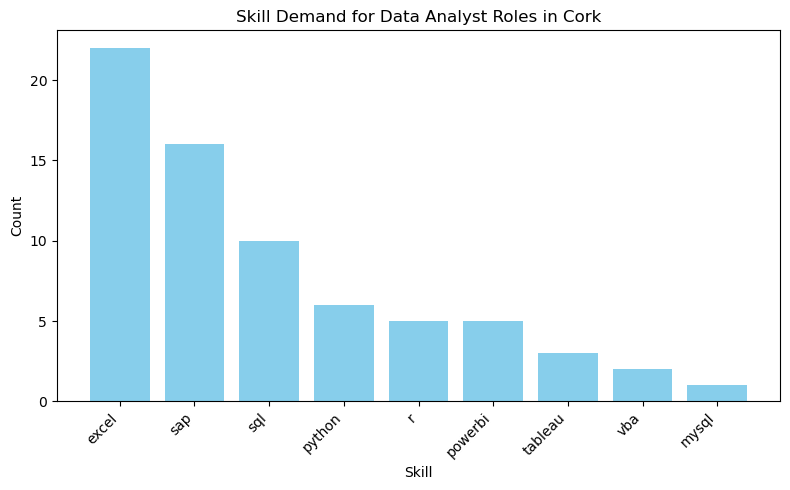

In [33]:
# Plotting
plt.figure(figsize=(8, 5))
plt.bar(most_demanding_skills['Skill'], most_demanding_skills['Count'], color='skyblue')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.title('Skill Demand for Data Analyst Roles in Cork')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

***From this analysis, we can deduce that "Excel" stands out as the most in-demand skill, followed by "SAP" and "SQL." These insights provide valuable information about the skill landscape in the Cork job market for data analyst roles.***